### Data and Task

Your goal is to discuss the pros and cons of Logistic Regression, Decision Trees, KNN, and SVM for the tasks below.  Consider at least the three questions above and list any additional considerations you believe are important to determining the "best" model for the task.  Share your response with your peers on the class discussion board.  

**TASK 1**: Predicting Customer Churn

Suppose you are tasked with producing a model to predict customer churn.  Which of your classification models would you use and what are the pros and cons of this model for this task?  Be sure to consider interpretability, imbalnced classes, and the speed of training.



In [1]:
import time
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import confusion_matrix, recall_score, precision_score, accuracy_score, mean_squared_error, plot_confusion_matrix, ConfusionMatrixDisplay,  precision_recall_curve, roc_curve
from sklearn.metrics import RocCurveDisplay, classification_report
from sklearn.impute import KNNImputer
from sklearn.linear_model  import LogisticRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn import set_config
import time

In [2]:
from sklearn.datasets import load_digits

The data is loaded below.  Note that the handwritten digit data is already split into features and target (`digits`, `labels`). 

In [3]:
bank = pd.read_csv('data/bank_new.csv')
digits, labels = load_digits(return_X_y=True)
bank["y"] = bank["y"].map({'yes':1,'no':0})

In [4]:
#churn data
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,0


In [5]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   int64 
dtypes: int64(8), object(9)
memory usage: 600.6+ KB


In [6]:
bank_new=bank[['age','balance','day','duration','campaign','pdays','previous','y']]
bank_new.head()

,age,balance,day,duration,campaign,pdays,previous,y
0,30,1787,19,79,1,-1,0,0
1,33,4789,11,220,1,339,4,0
2,35,1350,16,185,1,330,1,0
3,30,1476,3,199,4,-1,0,0
4,59,0,5,226,1,-1,0,0


In [7]:
bank_new.groupby(['y']).size()

y
0    4000
1     521
dtype: int64

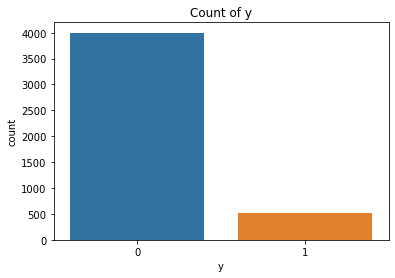

In [8]:
sns.countplot(data=bank_new, x = 'y')
plt.title('Count of y');

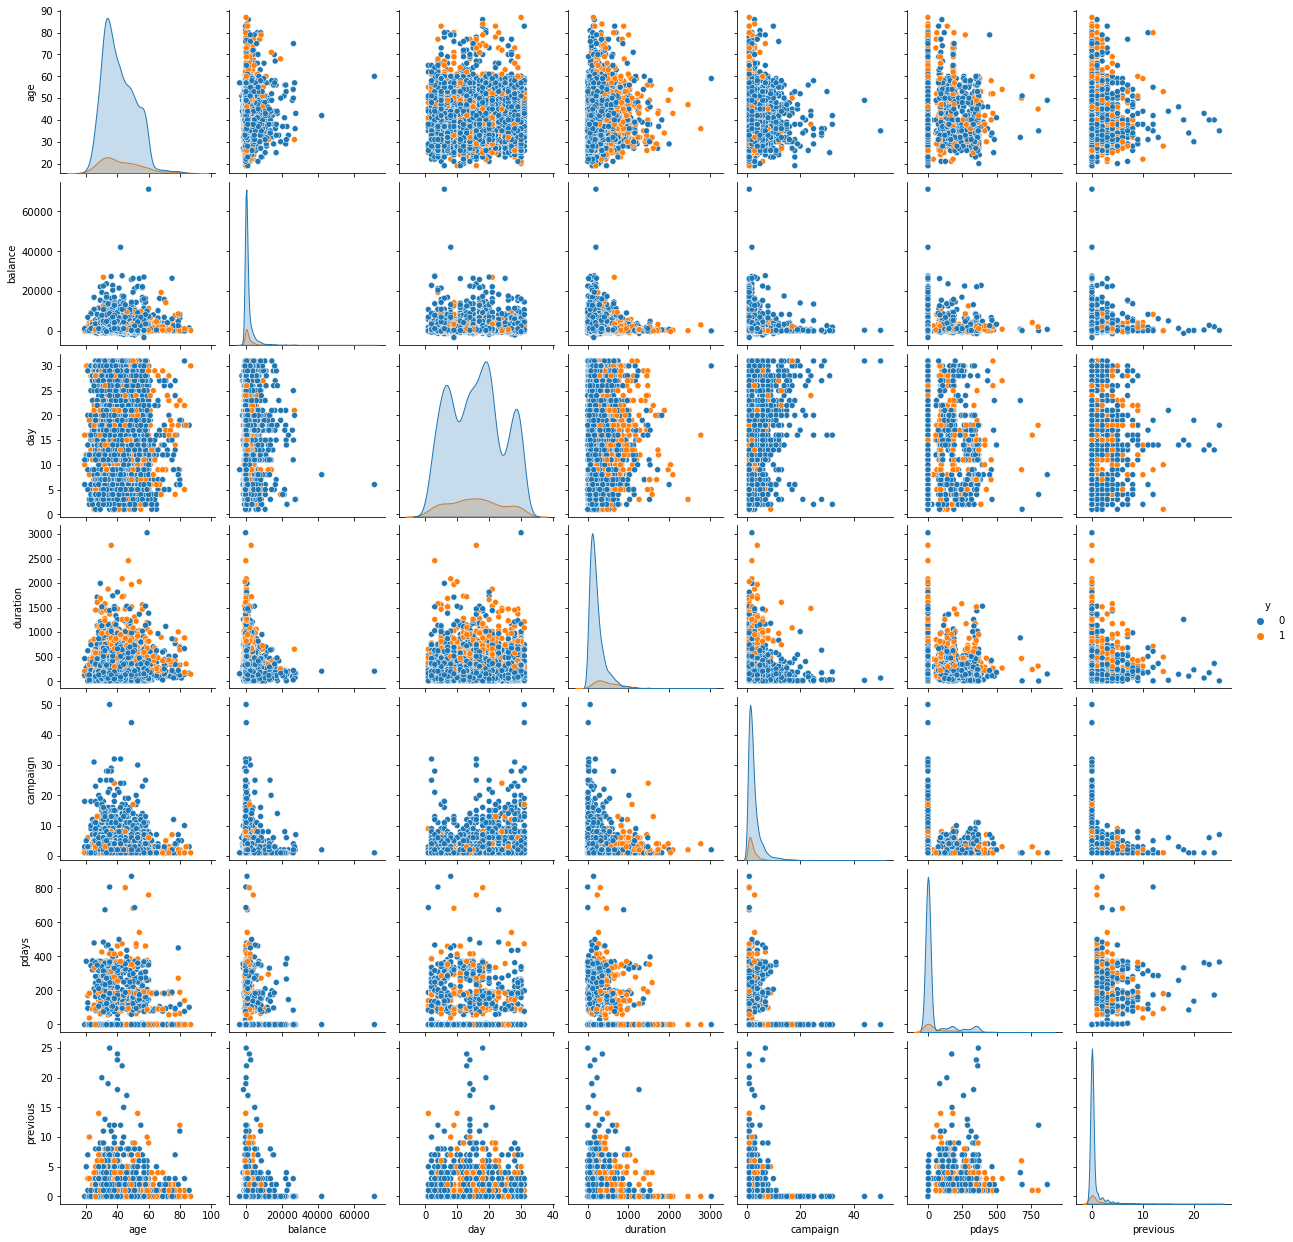

In [9]:
sns.pairplot(data=bank_new, hue='y')

In [10]:
X=bank_new[['age','balance','day','duration','campaign','pdays','previous']]
y=bank_new['y']

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [12]:
lr_pipe = Pipeline([('scale', StandardScaler()), ('lr', LogisticRegression())])
lr_grid = GridSearchCV(lr_pipe, param_grid = {'lr__C': [0.001,0.01,0.1,1,10,100,1000]}, scoring = 'roc_auc')

lr_grid.fit(X_train, y_train)
lr_preds = lr_grid.predict(X_test)
test_predictions = lr_grid.predict_proba(X_test)
ps= precision_score(y_test, lr_preds)
acs = accuracy_score(y_test, lr_preds)
rs = recall_score(y_test, lr_preds)

best_score = lr_grid.score(X_test, y_test)
C_best = lr_grid.best_params_['lr__C']

print(f'Accuracy score is: {acs: .2f}')
print(f'Recall score is: {rs: .2f}')
print(f'Precision_score is: {ps: .2f}')
print(f'The best score is: {best_score: .2f}')
print(f'The best C is: {C_best: .2f}')
print(classification_report(y_test, lr_preds, target_names=['0', '1']))

Accuracy score is:  0.90
Recall score is:  0.15
Precision_score is:  0.61
The best score is:  0.84
The best C is:  0.01
              precision    recall  f1-score   support

           0       0.90      0.99      0.94      1006
           1       0.61      0.15      0.24       125

    accuracy                           0.90      1131
   macro avg       0.76      0.57      0.59      1131
weighted avg       0.87      0.90      0.87      1131



              precision    recall  f1-score   support

       False       0.90      0.99      0.94      1006
        True       0.61      0.15      0.24       125

    accuracy                           0.90      1131
   macro avg       0.76      0.57      0.59      1131
weighted avg       0.87      0.90      0.87      1131

Elapsed during training: 0.01s
Accuracy score is:  0.90


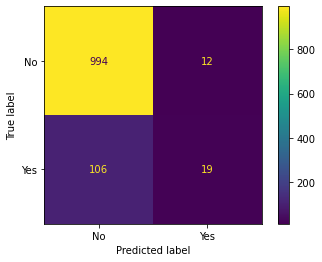

In [20]:
lr_pipe = Pipeline([('scale', StandardScaler()), ('lr', LogisticRegression(C=0.01))])

start_time = time.time()
lr_pipe_fit = lr_pipe.fit(X_train, y_train)
elapsed_time = time.time() - start_time

preds = lr_pipe_fit.predict(X_test)
acs = accuracy_score(y_test, preds)

cancer_confusion_mat = confusion_matrix(y_test, preds, labels=["0", "1"])
ConfusionMatrixDisplay.from_predictions(y_test, preds, display_labels = ['No', 'Yes'])

#print(lr_pipe_fit.score(X_test, y_test))
print(classification_report(y_test, preds, target_names=['False', 'True']))
print(f'Elapsed during training: {elapsed_time:.2f}s')
print(f'Accuracy score is: {acs: .2f}')

In [14]:
dt = DecisionTreeClassifier()
dt_grid = GridSearchCV(dt, param_grid = {'criterion':['gini','entropy'],'max_depth':[4,5,6,7,8,9,10,11,12,14,15,16,20,21]})
                       #scoring = 'accuracy')

dt_grid.fit(X_train, y_train)

preds = dt_grid.predict(X_test)
test_predictions = dt_grid.predict_proba(X_test)
ps= precision_score(y_test, preds)
acs = accuracy_score(y_test, preds)
rs = recall_score(y_test, preds)

best_score = dt_grid.score(X_test, y_test)
param_best = dt_grid.best_params_

print(f'Accuracy score is: {acs: .2f}')
print(f'Recall score is: {rs: .2f}')
print(f'Precision_score is: {ps: .2f}')
print(f'The best score is: {best_score: .2f}')
print(f'The best param is: {param_best}')
print(classification_report(y_test, preds, target_names=['0', '1']))

Accuracy score is:  0.89
Recall score is:  0.32
Precision_score is:  0.53
The best score is:  0.89
The best param is: {'criterion': 'entropy', 'max_depth': 5}
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      1006
           1       0.53      0.32      0.40       125

    accuracy                           0.89      1131
   macro avg       0.73      0.64      0.67      1131
weighted avg       0.88      0.89      0.88      1131



              precision    recall  f1-score   support

          No       1.00      1.00      1.00      1006
         Yes       1.00      0.98      0.99       125

    accuracy                           1.00      1131
   macro avg       1.00      0.99      0.99      1131
weighted avg       1.00      1.00      1.00      1131

Elapsed during training: 0.02s
Accuracy score: 0.9973s


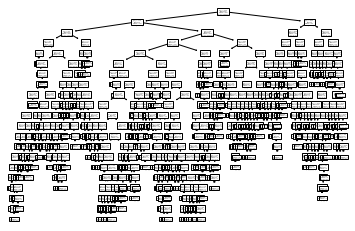

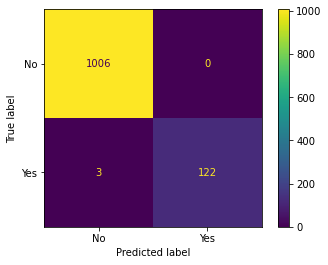

In [15]:
treeclass = DecisionTreeClassifier(criterion='gini',max_depth = 20)

start_time = time.time()
tree1 = treeclass.fit(X, y)
elapsed_time = time.time() - start_time

tree1_plot = plot_tree(tree1)
depth_1 = export_text(tree1, feature_names = list(X.columns))

test_preds = tree1.predict(X_test)
test_score = accuracy_score(y_test, test_preds)

cancer_confusion_mat = confusion_matrix(y_test, test_preds, labels=["0", "1"])
ConfusionMatrixDisplay.from_predictions(y_test, test_preds, display_labels = ['No', 'Yes'])

print(classification_report(y_test, test_preds, target_names=['No', 'Yes']))
print(f'Elapsed during training: {elapsed_time:.2f}s')
print(f'Accuracy score: {test_score:.4f}s')

In [16]:
knn_pipe = Pipeline([('scale', StandardScaler()), ('knn', KNeighborsClassifier())])
knn_grid = GridSearchCV(knn_pipe, param_grid = {'knn__n_neighbors': range(1, 23, 2)}, scoring = 'accuracy')

knn_grid.fit(X_train, y_train)

preds = knn_grid.predict(X_test)
test_predictions = knn_grid.predict_proba(X_test)
ps= precision_score(y_test, preds)
acs = accuracy_score(y_test, preds)
rs = recall_score(y_test, preds)

best_score = knn_grid.score(X_test, y_test)
neighbors_best = knn_grid.best_params_['knn__n_neighbors']

# Answer check
print(neighbors_best)

print(f'Accuracy score is: {acs: .2f}')
print(f'Recall score is: {rs: .2f}')
print(f'Precision_score is: {ps: .2f}')
print(f'The best score is: {best_score: .2f}')
print(f'The best param is: {neighbors_best: .2f}')
print(classification_report(y_test, preds, target_names=['0', '1']))

13
Accuracy score is:  0.88
Recall score is:  0.14
Precision_score is:  0.43
The best score is:  0.88
The best param is:  13.00
              precision    recall  f1-score   support

           0       0.90      0.98      0.94      1006
           1       0.43      0.14      0.22       125

    accuracy                           0.88      1131
   macro avg       0.67      0.56      0.58      1131
weighted avg       0.85      0.88      0.86      1131



Pipeline(steps=[('scale', StandardScaler()),
                ('knn', KNeighborsClassifier(n_neighbors=13))])
[0 1]
              precision    recall  f1-score   support

          No       0.90      0.98      0.94      1006
         Yes       0.43      0.14      0.22       125

    accuracy                           0.88      1131
   macro avg       0.67      0.56      0.58      1131
weighted avg       0.85      0.88      0.86      1131

Elapsed during training: 0.01s
Accuracy score: 0.8842s


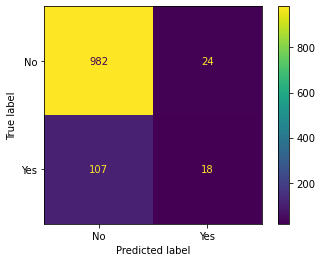

In [17]:
knn_pipe = Pipeline([('scale', StandardScaler()), ('knn', KNeighborsClassifier(n_neighbors=13))])

start_time = time.time()
knn_pipe.fit(X_train, y_train)
elapsed_time = time.time() - start_time

knn_preds = knn_pipe.predict(X_test)
#test_predictions = knn_pipe.predict_proba(X_test)
acs = accuracy_score(y_test, knn_preds)

cancer_confusion_mat = confusion_matrix(y_test, knn_preds, labels=knn_pipe.classes_)
ConfusionMatrixDisplay.from_predictions(y_test, knn_preds, display_labels = ['No', 'Yes'])

print(knn_pipe)
print(knn_pipe.classes_)
print(classification_report(y_test, knn_preds, target_names=['No', 'Yes']))
print(f'Elapsed during training: {elapsed_time:.2f}s')
print(f'Accuracy score: {acs:.4f}s')

In [21]:
#parameters = {'kernel':('linear', 'rbf','poly'), 'C':[1, 2]}
parameters = {'kernel':('rbf','poly')}
svc_grid = GridSearchCV(SVC(), parameters)

svc_grid.fit(X_train, y_train)

preds = svc_grid.predict(X_test)
ps= precision_score(y_test, preds)
acs = accuracy_score(y_test, preds)
rs = recall_score(y_test, preds)

best_score = svc_grid.score(X_test, y_test)
param_best = svc_grid.best_params_

print(f'Accuracy score is: {acs: .2f}')
print(f'Recall score is: {rs: .2f}')
print(f'Precision_score is: {ps: .2f}')
print(f'The best score is: {best_score: .2f}')
print(f'The best param is: {param_best}')
print(classification_report(y_test, preds, target_names=['0', '1']))

Accuracy score is:  0.89
Recall score is:  0.00
Precision_score is:  0.00
The best score is:  0.89
The best param is: {'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      1006
           1       0.00      0.00      0.00       125

    accuracy                           0.89      1131
   macro avg       0.44      0.50      0.47      1131
weighted avg       0.79      0.89      0.84      1131



              precision    recall  f1-score   support

          No       0.89      1.00      0.94      1006
         Yes       0.00      0.00      0.00       125

    accuracy                           0.89      1131
   macro avg       0.44      0.50      0.47      1131
weighted avg       0.79      0.89      0.84      1131

Elapsed during training: 0.17s
Accuracy score: 0.8886s


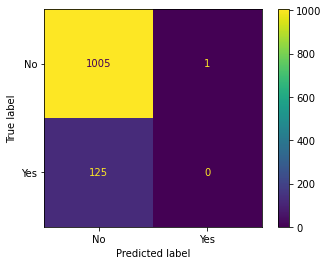

In [19]:
svc_polyclass = SVC(kernel='rbf')

start_time = time.time()
svc_poly = svc_polyclass.fit(X_train, y_train)
elapsed_time = time.time() - start_time

svc_preds = svc_poly.predict(X_test)
#test_score = svc_poly.score(X_test, y_test)
acs = accuracy_score(y_test, svc_preds)

cancer_confusion_mat = confusion_matrix(y_test, svc_preds, labels=["0", "1"])
ConfusionMatrixDisplay.from_predictions(y_test, svc_preds, display_labels = ['No', 'Yes'])

print(classification_report(y_test, svc_preds, target_names=['No', 'Yes']))
print(f'Elapsed during training: {elapsed_time:.2f}s')
print(f'Accuracy score: {acs:.4f}s')